# Marathon Data Playground

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

/Users/brendanlai/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("MarathonData.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [3]:
print(f"The marathon ran by {df.id.size} runners is {df.Marathon.value_counts().keys()[0]} for which this data was collected and used on.")

The marathon ran by 87 runners is Prague17


In [4]:
# Calculate the amount of time spent running 4 weeks prior to the marathon
training_time = df['km4week'].div(df['sp4week'])
df['training_time'] = training_time

In [5]:
# Binning marathon result times by quarter hours from 3 to 4
def groupMarathonTime(df):
    if df['MarathonTime'] <= 2.833:
        return "<2:50 hours"
    
    elif df['MarathonTime'] > 2.833 and df['MarathonTime'] <= 3:
        return "2:50 - 3:00 hours"

    elif df['MarathonTime'] > 3 and df['MarathonTime'] <= 3.25:
        return "3:00 - 3:15 hours"
    
    elif df['MarathonTime'] > 3.25 and df['MarathonTime'] <= 3.5:
        return "3:15 - 3:30 hours"
    
    elif df['MarathonTime'] > 3.5 and df['MarathonTime'] <=3.75:
        return "3:30 - 3:45 hours"
    
    elif df['MarathonTime'] > 3.75 and df['MarathonTime'] <= 4:
        return "3:45 - 4:00 hours"
    else:
        return ">4:00 hours"


df["MarathonTimeGroup"] = df.apply(groupMarathonTime, axis=1)


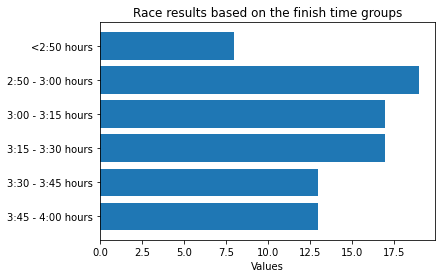

In [13]:
# Horizontal bar chart showing the group of finish times
resultGroups = df.MarathonTimeGroup.value_counts().to_dict()
groups = sorted(list(resultGroups.keys()), key=str.lower)
groups = groups[-1:]+groups[:-1]

values = list(resultGroups.values())
values = values[-1:] + values[:-1]


fig, ax = plt.subplots()

ax.barh(groups, values, align='center')
ax.set_yticks(groups, labels=groups)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Values')

ax.set_title('Race results based on the finish time groups')

plt.show()

In [34]:
# Encode Countries and set unique numerical values for country
conds = [df['MarathonTimeGroup'] == '<2:50 hours',
         df['MarathonTimeGroup'] == '2:50 - 3:00 hours',
         df['MarathonTimeGroup'] == '3:00 - 3:15 hours',
         df['MarathonTimeGroup'] == '3:15 - 3:30 hours',
         df['MarathonTimeGroup'] == '3:30 - 3:45 hours',
         df['MarathonTimeGroup'] == '3:45 - 4:00 hours',
         df['MarathonTimeGroup'] == '>4:00 hours'
]
 
 
vals = list(range(1,len(conds) + 1))
df['finishEncoded'] = np.select(conds, vals)
df['finishEncoded'].value_counts()

3    19
4    17
5    17
2    13
6    13
1     8
Name: finishEncoded, dtype: int64

Text(0.5, 1.0, 'Finish Time Grouping Plotted by Training time in the final four weeks')

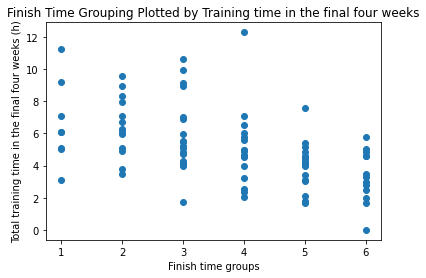

In [36]:
plt.scatter(df['finishEncoded'], df['training_time'])
plt.ylabel("Total training time in the final four weeks (h)")
plt.xlabel("Finish time groups")
plt.title("Finish Time Grouping Plotted by Training time in the final four weeks")

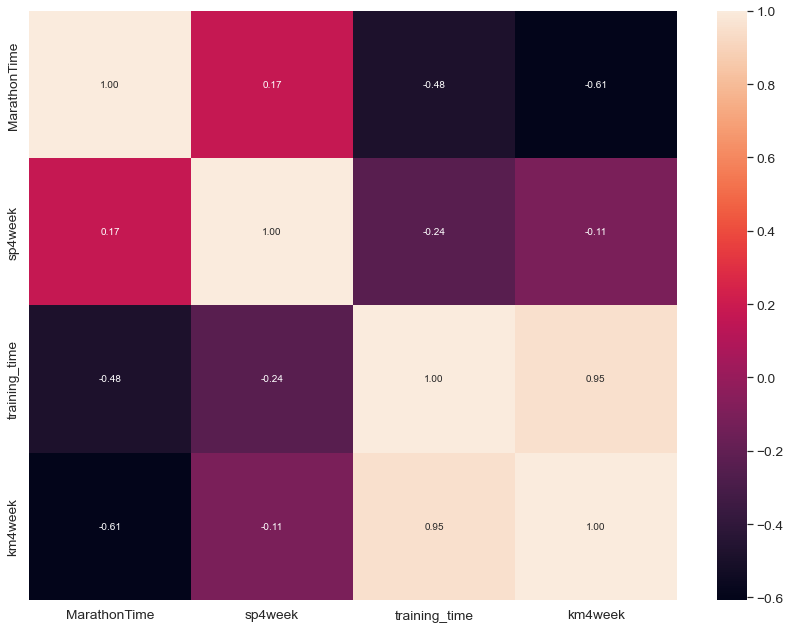

In [49]:
# creating a correlation matrix
corr_df = df[['km4week','sp4week','Wall21','MarathonTime','training_time']]
corr = corr_df.corr()
# focused heatmap - Popularity
# number of variables to be selected
k =5

# finding the most correlated variables
cols = corr.nlargest(k, 'MarathonTime')['MarathonTime'].index
cm = np.corrcoef(df[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()